In [1]:
from fbprophet import Prophet
from prophet.diagnostics import cross_validation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics import mean_absolute_percentage_error
import json

In [2]:
df = pd.read_pickle('../Data/ELC_12-14_15min_dropped.pkl')
df = df.resample('1D').mean()
df = df.loc['2012-01-01':'2014-12-31']
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369
2012-01-01,7.493989,26.293329,21.043486,119.833119,57.779204,259.805764,5.682663,232.996633,60.581524,66.281834,...,390.927978,271.129644,29533.684211,2097.357317,2127.272727,18.060797,10.409288,433.325632,51.647483,695.539435
2012-01-02,10.681049,26.834400,4.986606,128.006436,64.723069,243.582589,4.127803,293.806117,87.357955,57.885305,...,543.973867,320.187961,36400.000000,2514.196554,2549.715909,77.995980,23.472547,568.252488,147.450612,805.252627
2012-01-03,10.839679,29.960882,8.072690,122.967480,67.251016,233.413938,3.798050,292.262907,81.220862,85.091846,...,579.507036,250.111527,35885.416667,2401.503165,2861.742424,81.567797,27.489272,578.486245,162.632165,836.792827
2012-01-04,11.394882,26.145389,14.262960,121.845359,69.296240,237.444196,3.874600,284.652076,81.038753,73.756720,...,530.895925,299.443850,35635.416667,2569.356540,2851.325758,78.213277,22.771601,554.479441,149.554814,798.234360
2012-01-05,14.078363,27.508594,41.304663,121.803015,66.501524,220.920139,3.450631,274.901796,81.931090,80.421147,...,533.888432,274.907804,36235.416667,2436.225387,2712.357955,76.583551,25.611956,588.024949,195.673344,831.699047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,2.207593,22.352122,1.846221,155.678354,76.753049,230.499752,5.252497,299.487935,62.153992,58.523746,...,360.517178,294.343326,32872.916667,2285.249648,2717.803030,87.910148,7.271553,557.095040,81.489983,739.254949
2014-12-28,2.366223,22.203947,1.574718,149.242039,70.591972,209.604415,4.475221,263.082211,53.321678,49.943996,...,421.086897,300.157626,34084.375000,2299.182489,2682.054924,85.098870,5.753852,478.279558,45.892460,688.912818
2014-12-29,2.590948,23.048542,1.674269,146.532012,74.987297,237.754216,5.735350,315.481201,69.766171,66.017025,...,431.549251,300.261718,32386.458333,2154.711674,2803.030303,87.896567,12.019700,561.759219,134.529772,769.611437
2014-12-30,2.419099,22.974455,1.719519,148.860942,74.885671,248.759921,6.112210,321.969697,67.580857,67.596326,...,370.031524,296.752320,30253.125000,2126.318565,2745.975379,110.576923,9.295153,586.817749,166.631886,770.314027


In [3]:
df_marked = df.copy()

In [4]:
df_avg_1h = []
for i in tqdm(range(df_marked.shape[0])):
    df_avg_1h.append(df_marked.iloc[i,:].sum()/len(df_marked.iloc[i,:].dropna()))
df_avg_1h = pd.DataFrame(df_avg_1h,index=df_marked.index,columns=['avg_1h'])
df_avg_1h

100%|██████████| 1096/1096 [00:00<00:00, 10128.91it/s]


,avg_1h
2012-01-01,399.521686
2012-01-02,590.506390
2012-01-03,591.221033
2012-01-04,593.381152
2012-01-05,595.020094
...,...
2014-12-27,546.376092
2014-12-28,540.622141
2014-12-29,542.862690
2014-12-30,541.107932


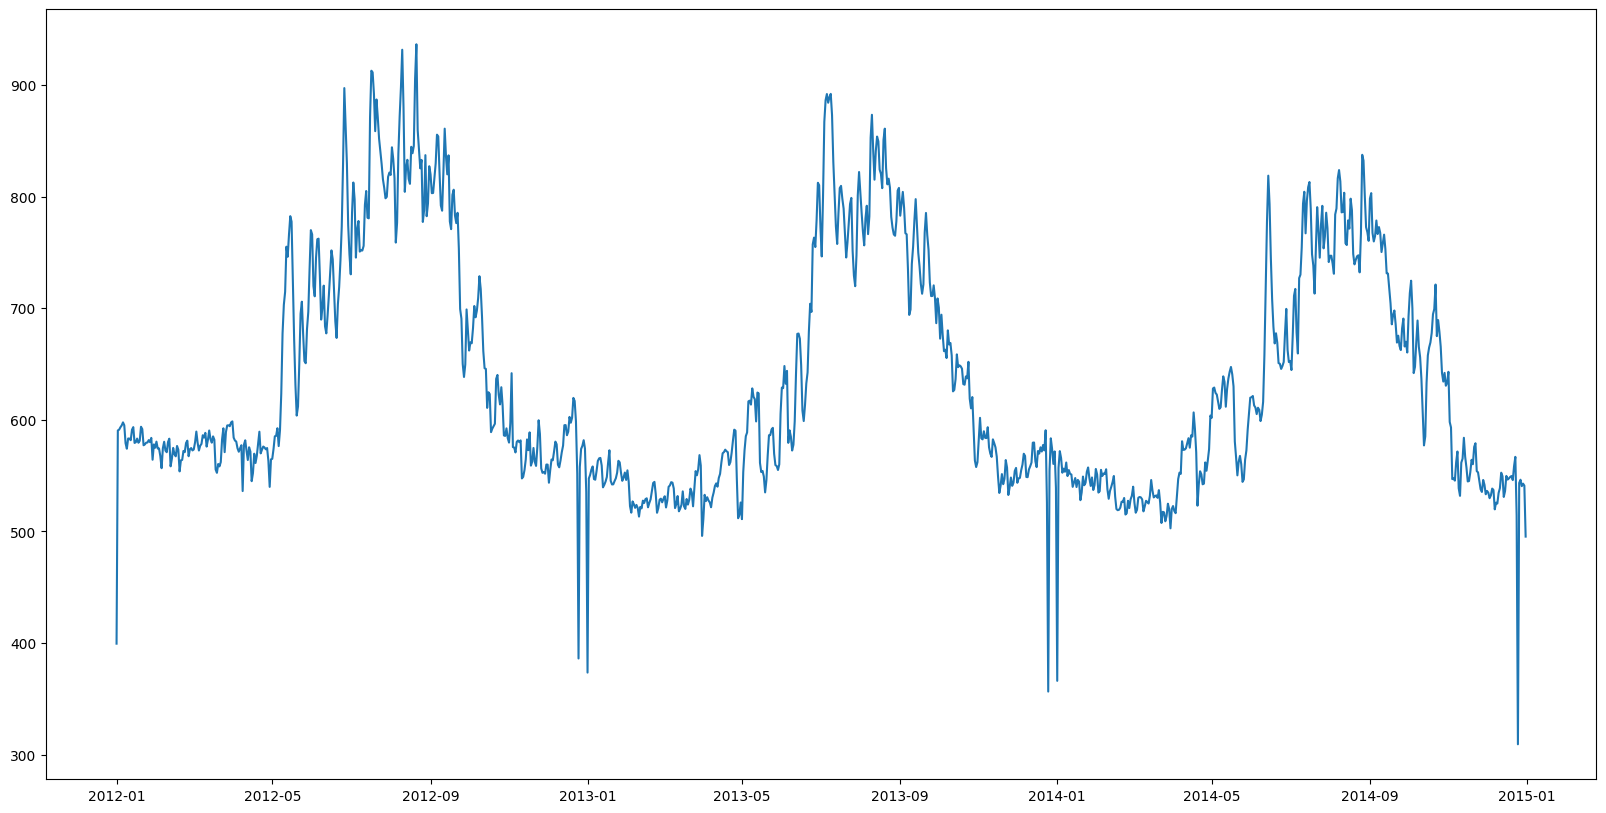

In [5]:
plt.figure(figsize=(20,10))
plt.plot(df_avg_1h)

In [6]:
#df_avg_1h.to_pickle('../Data/df_avg_1h.pkl')

In [7]:
df_avg_1h['ds'] = df_avg_1h.index
df_avg_1h['y'] = df_avg_1h['avg_1h']
df_avg_1h = df_avg_1h.drop('avg_1h',axis=1)

In [8]:
df_avg_1h

,ds,y
2012-01-01,2012-01-01,399.521686
2012-01-02,2012-01-02,590.506390
2012-01-03,2012-01-03,591.221033
2012-01-04,2012-01-04,593.381152
2012-01-05,2012-01-05,595.020094
...,...,...
2014-12-27,2014-12-27,546.376092
2014-12-28,2014-12-28,540.622141
2014-12-29,2014-12-29,542.862690
2014-12-30,2014-12-30,541.107932


In [9]:
training_x = df_avg_1h.iloc[:int(len(df_avg_1h)*0.8)]
val_x = df_avg_1h.iloc[int(len(df_avg_1h)*0.8):int(len(df_avg_1h)*0.9)]
testing_x = df_avg_1h.iloc[int(len(df_avg_1h)*0.9):]

In [10]:
print(training_x.shape)
print(val_x.shape)
print(testing_x.shape)


(876, 2)
(110, 2)
(110, 2)


In [11]:
m = Prophet(growth='linear',yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True,seasonality_mode='multiplicative')
m.add_country_holidays(country_name='PT')
m.fit(training_x)

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2565.42    0.00176172       292.694           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2568.41   0.000250377       74.7948           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2569.36   0.000135042       75.2714      0.1424      0.1424      388   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     335        2569.5   5.75668e-05       135.523   4.714e-07       0.001      473  LS failed, Hessian reset 
     399       2569.56   3.40121e-05       83.0918           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2569.71   6.73728e-05       76.4606           1           1      6

In [12]:
future = val_x[['ds']]
future.tail()

,ds
2014-09-08,2014-09-08
2014-09-09,2014-09-09
2014-09-10,2014-09-10
2014-09-11,2014-09-11
2014-09-12,2014-09-12


In [13]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
105,2014-09-08,767.735940,732.068193,810.068687
106,2014-09-09,773.997551,736.204868,813.896259
107,2014-09-10,770.270964,732.976273,808.611892
108,2014-09-11,768.412824,728.302238,804.807831
109,2014-09-12,769.283578,728.046787,806.284126


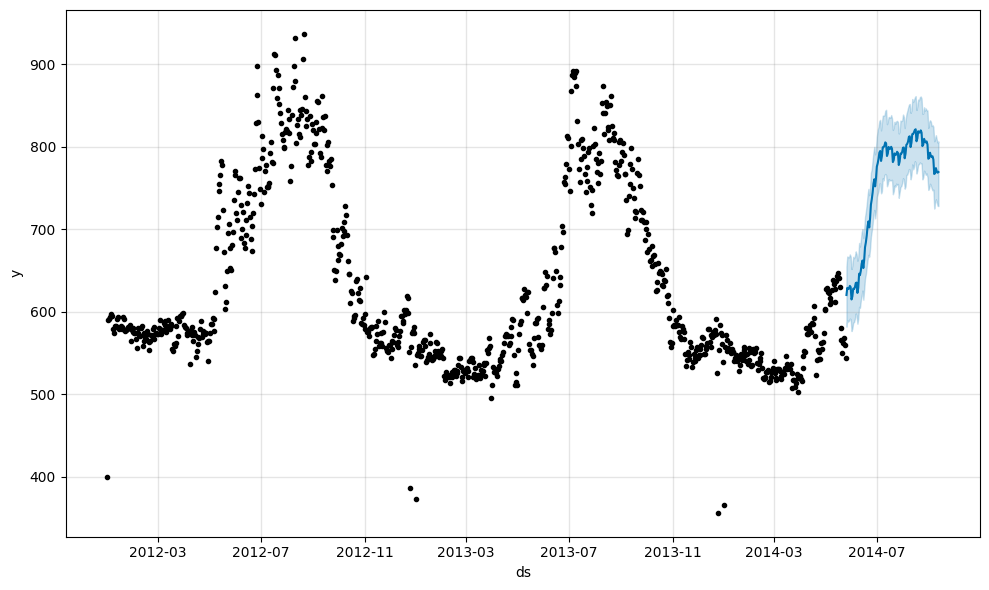

In [14]:
fig1 = m.plot(forecast)

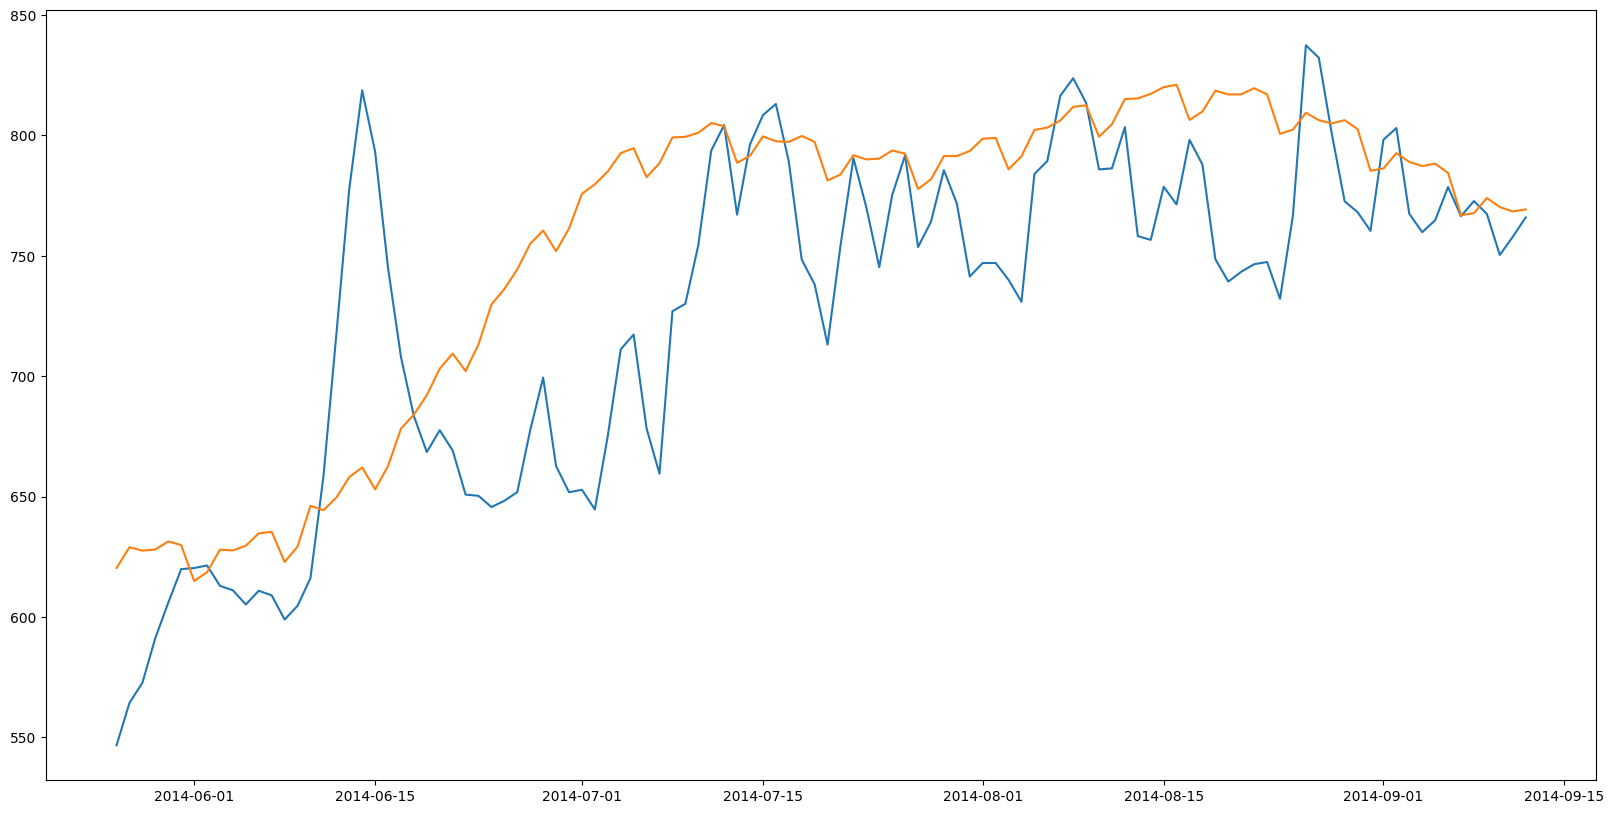

In [15]:
plt.figure(figsize=(20,10))
plt.plot(val_x['y'],label='Actual')
plt.plot(forecast['ds'],forecast['yhat'],label='Predicted')

In [16]:
print(mean_absolute_percentage_error(val_x['y'],forecast['yhat']))

0.05961551736317611


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


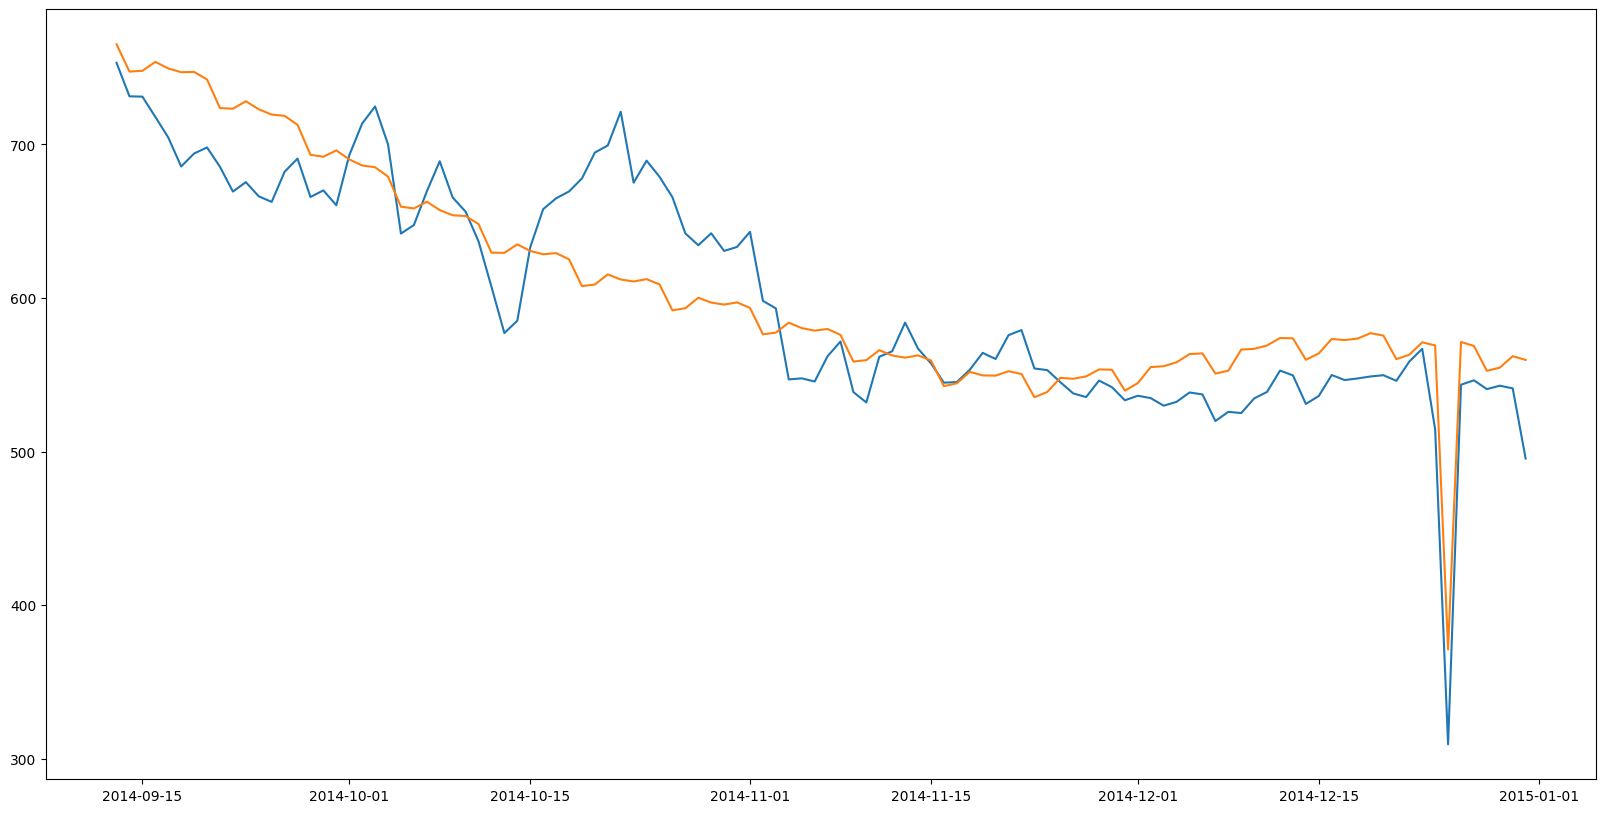

In [17]:
future = testing_x[['ds']]
forecast = m.predict(future)
plt.figure(figsize=(20,10))
plt.plot(testing_x['y'],label='Actual')
plt.plot(forecast['ds'],forecast['yhat'],label='Predicted')

In [18]:
print(mean_absolute_percentage_error(testing_x['y'],forecast['yhat']))

0.04839327262085314


/opt/homebrew/lib/python3.9/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabe

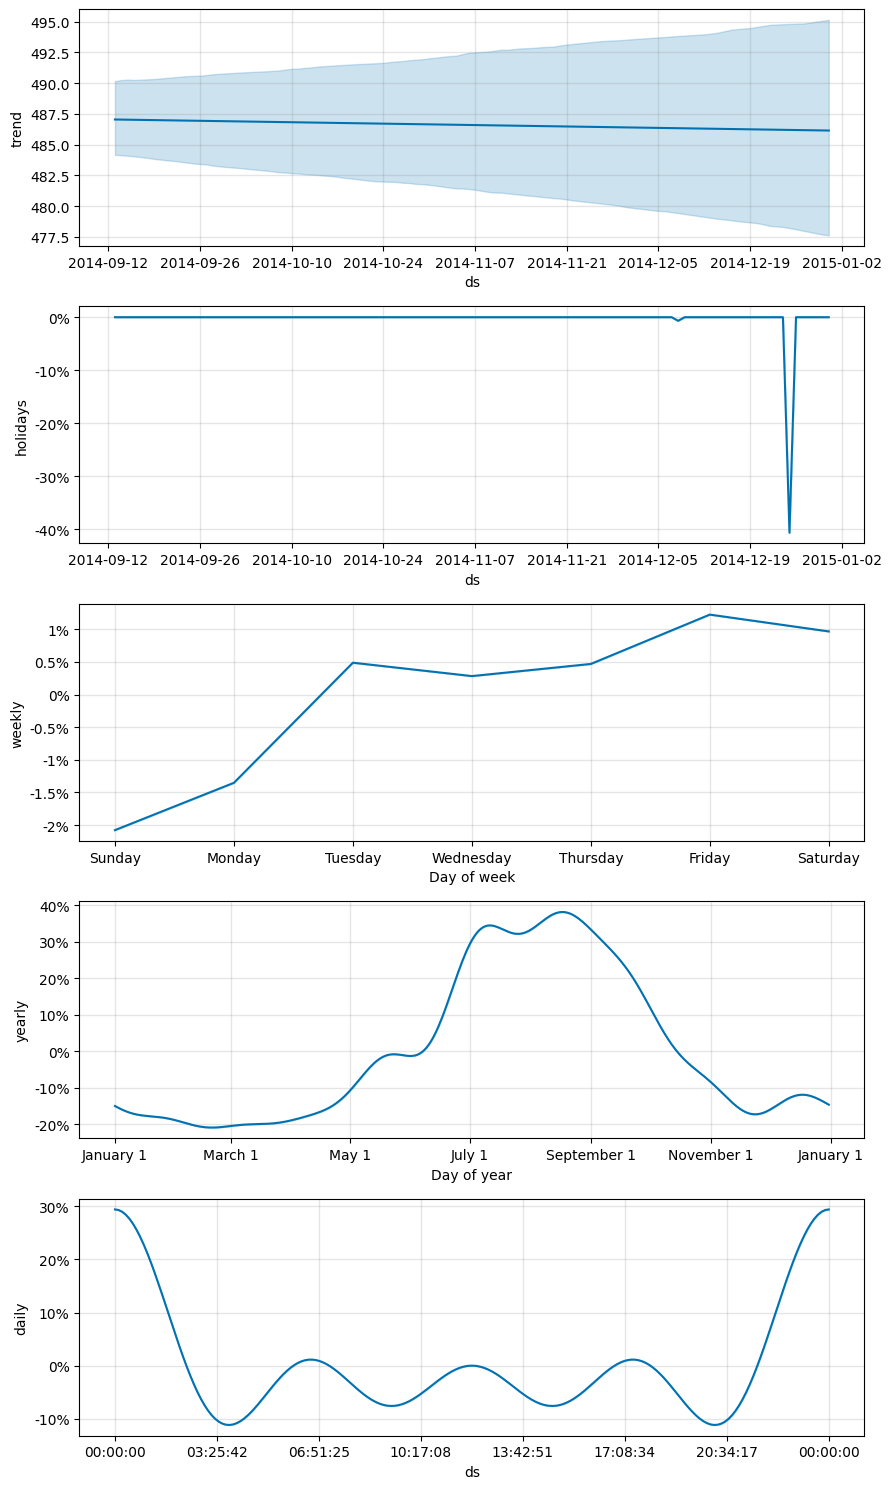

In [19]:
fig = m.plot_components(forecast)

# Hyperparameter tuning with Bayes Optimization

In [20]:
from bayes_opt import BayesianOptimization

In [22]:
def prophet_objective(changepoint_prior_scale, seasonality_prior_scale, holiday_prior_scale, changepoint_range):
    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale= holiday_prior_scale,
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True,
        seasonality_mode='multiplicative',
        changepoint_range=changepoint_range
    )
    model.add_country_holidays(country_name='PT')
    model.fit(training_x)

    forecast = model.predict(val_x[['ds']])
    mape = mean_absolute_percentage_error(val_x['y'],forecast['yhat'])
    return -mape

# Set bounds for the hyperparameters
bounds = {
    'changepoint_prior_scale': (0.001, 0.5),
    'seasonality_prior_scale': (0.01, 10.0),
    'holiday_prior_scale': (0.01, 10),
    'changepoint_range': (0.8,0.95)
}

# Initialize the Bayesian optimization
optimizer = BayesianOptimization(
    verbose=1,
    f=prophet_objective,
    pbounds=bounds,
    random_state=42,
)

# Perform the optimization
optimizer.maximize(init_points=10, n_iter=20)

|   iter    |  target   | change... | change... | holida... | season... |
-------------------------------------------------------------------------
Initial log joint probability = -21.6761


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2572.7    0.00229773       102.184           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2576.03     0.0047673        222.14           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2578.9   0.000206048       78.4285           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2580.08    0.00149594        53.659       4.098      0.4098      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2586.84    0.00391532       569.916           1           1      596   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2568.8   0.000727868       167.161      0.3182           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2570.78   0.000337454       82.3462           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       2571.34   3.65933e-05       82.0768   5.136e-07       0.001      352  LS failed, Hessian reset 
     299        2571.7   3.69156e-05       59.0793      0.2601      0.2601      425   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2571.86   0.000107163       50.7054           1           1      550   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2572.94   0.000779487    

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 2         | -0.28     | 0.07885   | 0.8234    | 0.5903    | 8.663     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2572.87    0.00584906       365.309        0.54        0.54      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2578.19    0.00547964       267.598           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2582.32   0.000595853       165.458       0.714       0.714      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2593.08     0.0141768        591.35      0.4497           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2601.13    0.00170655       225.957     0.04927       0.944      585   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2575.06    0.00396566        250.97      0.8275     0.08275      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2581.69   0.000603727       87.5025           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2592.6      0.050356       1370.35      0.2677      0.4658      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2609.96    0.00173363       2499.03      0.1668           1      486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2617.43    0.00741279       520.305           1           1      592   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2572.54    0.00320969       150.982           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2577.06     0.0293835        188.28           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2585.27    0.00818042       142.763           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2595.75    0.00267737       501.046           1           1      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2604.12    0.00555374       572.323       1.976      0.1976      593   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 5         | -0.2121   | 0.1528    | 0.8787    | 4.325     | 2.919     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2574.61    0.00191501       45.9819           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2578.24    0.00116653       104.974           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2586.55    0.00224728       403.997           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2591.37   0.000317388       140.448           1           1      485   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2597.15    0.00711641       902.185      0.4501     0.04501      614   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2573.98    0.00181801       205.973      0.4632      0.4632      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2579.79    0.00101309       199.608      0.2148      0.2148      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2585.8    0.00076496        231.73           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2601.07      0.016459       259.095           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2609.99    0.00277246       236.776           1           1      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


|dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199       2635.64    0.00200992       114.961           1           1     1435   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299        2638.6   0.000198674       607.707           1           1     1559   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       2641.38   0.000929815       140.998           1           1     1679   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       2642.32   0.000396604       190.271           1           1     1798   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       2643.78   0.000132863       294.833      0.1583      0.1583     1916   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699        2644.7    0.00165661       3

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2574.66    0.00017001        109.43           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2582.29     0.0048169       228.565           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2591.36     0.0130858        397.58      0.6316      0.6316      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2599.09   0.000713879       112.683           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        2611.8   0.000858025       1499.13      0.1532           1      588   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2561.7   0.000519929        87.624      0.5926      0.5926      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2565.2   0.000324757       85.3837      0.2585           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     253       2565.88   0.000236763       341.192   1.362e-06       0.001      361  LS failed, Hessian reset 
     299       2566.03   0.000267423       136.586      0.1069           1      418   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     377       2566.07   5.37685e-08       89.5741      0.3139           1      524   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 9         | -0.06747  | 0.03346   | 0.9423    | 9.657     | 8.086     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2572.99   0.000369213       101.483      0.9464      0.9464      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2576.73     0.0104538       462.448           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283       2578.32   2.67067e-05       67.0071   4.821e-07       0.001      381  LS failed, Hessian reset 
     299       2578.54   0.000939008       68.8892           1           1      401   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2580.25    0.00903289        204.11           1           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2583.78    0.00570868    

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebre

Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2551.33    0.00134685       788.281           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2553.3   3.29295e-07       499.777           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       2553.31   8.21447e-06       525.359   1.531e-08       0.001      318  LS failed, Hessian reset 
     254       2553.32   9.85824e-09        459.03      0.5053      0.5053      375   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
| 11        | -0.06315  | 0.008622  | 0.834     | 9.719     | 8.088     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2404.58   0.000142353        4913.2      0.3038      0.8491      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     125       2429.01    0.00132376       4032.24   2.757e-07       0.001      194  LS failed, Hessian reset 
     199       2460.76   5.47603e-07       4834.94      0.9055      0.9055      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2463.67   3.51769e-07       5186.76           1           1      402   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       2463.67   2.32857e-07       4844.42   5.301e-11       0.001      473  LS failed, Hessian reset 
     328       2463.67   9.01259e-09       4218.08      0.2878           1      489   
Optimization terminat

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2382.78   0.000103021       4455.51      0.7392      0.7392      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       2417.53    0.00123477       4473.57   2.908e-07       0.001      216  LS failed, Hessian reset 
     199       2458.06   4.15562e-06       4579.69      0.4214           1      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       2458.12   3.23898e-09       4771.56      0.2398      0.2398      331   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
| 13        | -0.04731  | 0.001     | 0.8       | 8.536     | 7.615     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2575.35    0.00227591       201.606           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2582.76    0.00407123       716.349           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2592.03   0.000189888       123.962      0.2752      0.2752      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2605.95     0.0190716       603.211      0.7712      0.7712      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2616.72     0.0113333       505.693           1           1      585   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebre

Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       2438.74    0.00304562       5326.28   5.843e-07       0.001      169  LS failed, Hessian reset 
      99       2446.69   0.000834742       4947.43      0.2344           1      174   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     193       2462.28   2.21687e-09       4595.92      0.1507      0.1507      292   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2398.69    0.00137171       4752.19           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     125       2417.76    0.00178032       4584.81   3.622e-07       0.001      242  LS failed, Hessian reset 
     199       2458.19   4.13024e-08       4067.51      0.2558      0.2558      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       2458.19   3.86003e-08       4933.04   7.938e-12       0.001      406  LS failed, Hessian reset 
     230       2458.19   2.59454e-09       3767.09      0.4013      0.4013      412   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2385.6   0.000383265       4214.03      0.5019      0.5019      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       2418.47    0.00095156       4335.86   2.132e-07       0.001      210  LS failed, Hessian reset 
     199       2457.47   3.37988e-05       4904.17           1           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2461.07   0.000174488       5601.74           1           1      396   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301        2461.1   1.59609e-05       5244.48   3.046e-09       0.001      444  LS failed, Hessian reset 
     350       2461.16   8.75251e-09       3916.81           1           1      503   
Optimization terminat

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2574.68    0.00311288       263.966           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2581.69    0.00283325       173.623      0.2465      0.9287      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2587.82     0.0399953       658.628      0.7855      0.1221      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2595.67    0.00121449       284.624      0.2919           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2599.66    0.00473763        111.26           1           1      593   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2575.57   0.000995449       155.866      0.4202      0.4202      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2584.44     0.0032526       71.1172      0.1967      0.9737      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2598.36     0.0036045       139.008           1           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2608.42     0.0122285       643.627           1           1      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2618.92    0.00101827       430.953           1           1      606   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebre

Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2575.23    0.00134241       98.5044           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2579.62    0.00124148       228.573           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2586.12       0.02604       701.261     0.06705           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2594.03     0.0190797        270.72           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2596.21    0.00734167       185.767       1.046      0.1046      574   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2574.93    0.00346239       121.908           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2579.67    0.00272573       80.1385           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2587.63     0.0217754       575.145           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2592.62    0.00299446       121.222           1           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2601.57    0.00548205       909.821           1           1      603   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2565.37    0.00160201       194.687      0.1093           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2567.48   0.000962611       147.749      0.7869      0.7869      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2568.37   0.000154995       148.512      0.2072      0.2072      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2568.65   0.000485213       52.0687           1           1      486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2568.86   3.36732e-05       31.2416           1           1      611   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2573.24   0.000295599       103.745      0.8108      0.8108      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2578.74     0.0199144       134.354           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          2586    0.00150582       176.229           1           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2597.56     0.0134818       1507.73      0.4645      0.9599      480   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2601.95    0.00326802       1040.95      0.2455           1      608   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


.24    0.00111129        449.02           1           1     6681   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    5599       2656.24    0.00167349       451.076      0.1956      0.1956     6798   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    5699       2657.22    0.00031153       309.744      0.3824      0.3824     6916   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    5799       2657.57     0.0024122       560.645      0.7783      0.7783     7035   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    5899       2658.77   0.000895735        1703.6           1           1     7157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    5999       2659.28   0.000390885       98.7158           1           1     7276   
    Iter      log prob        ||dx|| 

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2533.31    0.00110633       926.105      0.3044           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2537.6   0.000132572       922.167      0.7671      0.7671      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     274        2539.1   2.14027e-08       874.225      0.3243           1      341   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


      99        2573.4   0.000557384       159.623      0.8024      0.8024      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2580.05    0.00396906       355.697      0.4669      0.4669      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2590.36    0.00180187       163.426      0.2747      0.2747      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2599.32    0.00148699       181.733           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2602.87    0.00722205       842.805           1           1      590   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       2610.87    0.00935063       772.995           1           1      707   
    Iter      log 

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2382.2    0.00143109       4860.87      0.2513      0.2513      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       2470.64   8.99479e-06        5365.3   1.783e-09       0.001      271  LS failed, Hessian reset 
     199       2470.66    6.6778e-07       3476.43        1.53       0.153      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       2470.66   7.69501e-09       3505.97      0.4785      0.4785      331   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2570.98    0.00132674       485.663      0.7898      0.7898      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2577.92    0.00321482       104.069           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2591.09     0.0138469       366.768           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2599.32    0.00286179        88.898           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2606.77    0.00612706       289.263           1           1      587   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


      99       2575.14    0.00597808       100.597           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2582.39    0.00389766       301.903      0.2949           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2588.67    0.00171954       137.892           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2607.16       0.02195       550.916           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2620.24    0.00223177       368.059      0.4342           1      590   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       2634.19    0.00157146       221.817           1           1      703   
    Iter      log 

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      82       2425.84    0.00303691       5383.22   5.553e-07       0.001      156  LS failed, Hessian reset 
      99       2443.69    0.00222176       4329.79           1           1      178   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       2460.69   0.000769561       4445.49   1.667e-07       0.001      249  LS failed, Hessian reset 
     199       2473.28   1.03491e-06       4893.52           1           1      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       2473.49   7.99355e-06       4124.62   1.614e-09       0.001      419  LS failed, Hessian reset 
     299       2473.52    2.9538e-07       4574.24           1           1      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       2418.55    0.00307318       4727.39   5.996e-07       0.001      157  LS failed, Hessian reset 
      99       2440.73   0.000140998       4414.94      0.2212      0.2212      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119       2456.33   0.000238196       4589.23   5.498e-08       0.001      235  LS failed, Hessian reset 
     199       2466.31   2.47599e-06       4885.92      0.2801           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       2466.32   6.63278e-09       4943.64      0.3683      0.3683      361   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [23]:
# Extract the best hyperparameters
best_params = optimizer.max['params']

# Train and evaluate the model with the best hyperparameters
best_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale']
)
best_model.fit(pd.concat([training_x, val_x]))
best_forecast = best_model.predict(testing_x[['ds']])
best_mape = mean_absolute_percentage_error(testing_x['y'], best_forecast['yhat'])

print(f"Best hyperparameters: {best_params}")
print(f"Best mape: {best_mape}")

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -16.5296


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       2678.88   0.000631011       4833.31   1.221e-07       0.001      147  LS failed, Hessian reset 
      99       2681.55   0.000218518       4677.77           1           1      155   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2689.58   6.62074e-05       5016.54      0.3019           1      273   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     255       2691.48   7.19471e-09       4714.44      0.5351      0.5351      343   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Best hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holiday_prior_scale': 8.53572342759047, 'seasonality_prior_scale': 7.615294143795739}
Best mape: 0.05799733680779495


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


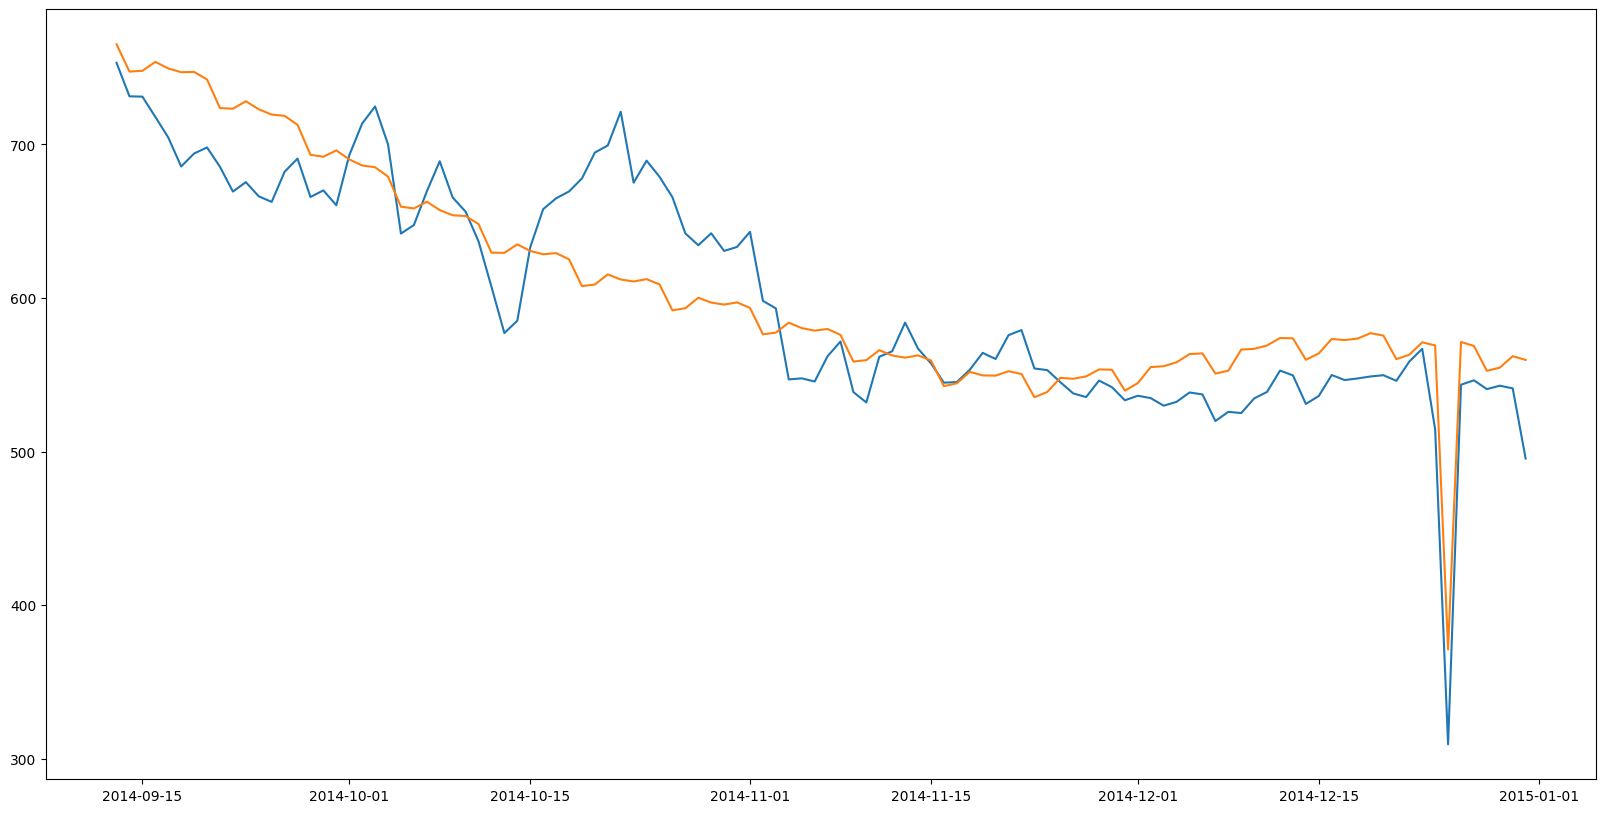

In [24]:
future = testing_x[['ds']]
forecast = m.predict(future)
plt.figure(figsize=(20,10))
plt.plot(testing_x['y'],label='Actual')
plt.plot(forecast['ds'],forecast['yhat'],label='Predicted')

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


MAPE test1:  0.04580526669734405


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


MAPE test2:  0.0527959859359776


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


MAPE test3:  0.046508619123196974


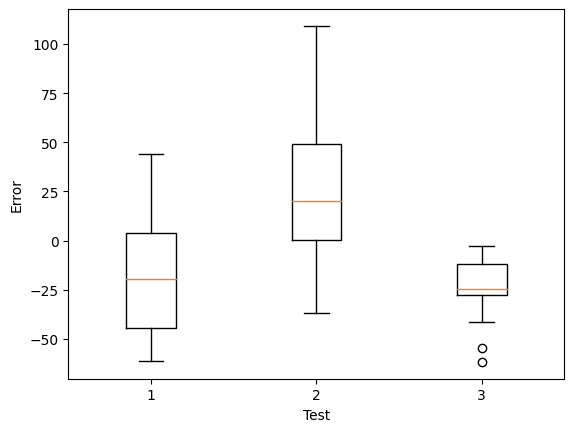

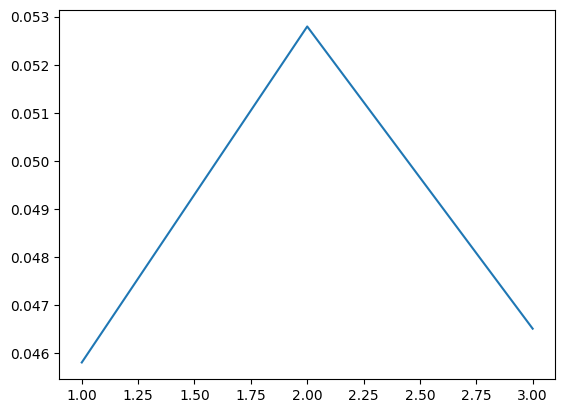

In [27]:
# split testing data into three parts
test1 = testing_x.iloc[:int(len(testing_x)/3)].reset_index(drop=True)
test2 = testing_x.iloc[int(len(testing_x)/3):int(len(testing_x)*2/3)].reset_index(drop=True)
test3 = testing_x.iloc[int(len(testing_x)*2/3):].reset_index(drop=True)
mape_test = []
err = pd.DataFrame(columns=['test1','test2','test3'])
forecast1 = m.predict(test1[['ds']])
err['test1'] = test1['y'] - forecast1['yhat']
mape_test.append(mean_absolute_percentage_error(test1['y'], forecast1['yhat']))
print("MAPE test1: ", mean_absolute_percentage_error(test1['y'], forecast1['yhat']))

forecast2 = m.predict(test2[['ds']])
err['test2'] = test2['y'] - forecast2['yhat']
mape_test.append(mean_absolute_percentage_error(test2['y'], forecast2['yhat']))
print("MAPE test2: ", mean_absolute_percentage_error(test2['y'], forecast2['yhat']))

forecast3 = m.predict(test3[['ds']])
err['test3'] = test3['y'] - forecast3['yhat']
mape_test.append(mean_absolute_percentage_error(test3['y'], forecast3['yhat']))
print("MAPE test3: ", mean_absolute_percentage_error(test3['y'], forecast3['yhat']))

plt.boxplot(err)
plt.xlabel('Test')
plt.ylabel('Error')
plt.show()

plt.plot([1,2,3],mape_test)

In [25]:
from prophet.serialize import model_to_json, model_from_json
with open('SavedModels/prophet_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model